#### Assignment
https://courses.thinkful.com/dsbc-model-prep-v1/checkpoint/4

In this assignment, you'll continue working with the U.S. Education Dataset from Kaggle. The data gives detailed state level information on several facets of education on an annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above.
Access this data using the Thinkful database using these credentials:

- postgres_user = 'dsbc_student'
- postgres_pw = '7*.8G9QH21'
- postgres_host = '142.93.121.174'
- postgres_port = '5432'
- postgres_db = 'useducation'


* Don't forget to apply the most suitable missing value filling techniques from the previous checkpoint to the data. Provide the answers to the following only after you've addressed missing values!


##### To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

* Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

* If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

* Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.
* Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

* Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

* If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

* Submit your work below, and plan on discussing with your mentor. You can also take a look at this example solution.

In [77]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

warnings.filterwarnings('ignore')

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

In [4]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

### * Don't forget to apply the most suitable missing value filling techniques from the previous checkpoint to the data. Provide the answers to the following only after you've addressed missing values!

#### Since the last checkpoint showed that year by year  mean() was probably a good way to handle the missing values, that's what we will be using here to handle missing values

In [20]:
df_education = df.copy()

#make a list of the columns that has missing values and we want to keep them
list_to_keep = ['ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',                   
                'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE',    
                'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',                      
                'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G', 
                'GRADES_9_12_G', 'GRADES_ALL_G']

years = df_education['YEAR'].unique()

for col in list_to_keep:
    for year in years:
        df_education.loc[df_education['YEAR'] == year, col] = df_education.loc[df_education['YEAR'] == year, col].fillna(df_education[df_education['YEAR'] == year][col].mean())  


## the solution uses interpolate to handle missing values -  Why? the reason it gives is because the data is time series. How do I know if my data is time series and how do I know that I have to use interpolate? I wanted to use year-by-year


### Also did not know that I had to drop the null values after interpolate - I did not know that we had to do that as well. Is this a std way to cleaning data?


In [21]:
#checking for null values
df_education.isnull().sum() * 100 / df.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           7.171582
TOTAL_REVENUE                    3.418231
FEDERAL_REVENUE                  3.418231
STATE_REVENUE                    3.418231
LOCAL_REVENUE                    3.418231
TOTAL_EXPENDITURE                3.418231
INSTRUCTION_EXPENDITURE          3.418231
SUPPORT_SERVICES_EXPENDITURE     3.418231
OTHER_EXPENDITURE                7.171582
CAPITAL_OUTLAY_EXPENDITURE       3.418231
GRADES_PK_G                      6.836461
GRADES_KG_G                      6.836461
GRADES_4_G                       6.836461
GRADES_8_G                       6.836461
GRADES_12_G                      6.836461
GRADES_1_8_G                     6.836461
GRADES_9_12_G                    6.836461
GRADES_ALL_G                     6.836461
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [61]:
# we drop the null values after taking care of missing values
df_education.dropna(inplace=True)

In [62]:
#lets look at the statistics of the variables
df_education.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,416.000000,4.160000e+02,4.160000e+02,4.160000e+02,4.160000e+02,4.160000e+02,4.160000e+02,4.160000e+02,4.160000e+02,4.160000e+02,...,416.000000,416.000000,416.000000,4.160000e+02,4.160000e+02,4.160000e+02,416.000000,416.000000,416.000000,416.000000
mean,2007.514423,9.414834e+05,1.047713e+07,9.431232e+05,4.850565e+06,4.683441e+06,1.058376e+07,5.471180e+06,3.092248e+06,4.794490e+05,...,72149.411058,72766.521635,64109.824519,5.814716e+05,2.852706e+05,8.791954e+05,236.595643,279.536042,219.312896,263.541828
std,5.287839,1.120275e+06,1.307360e+07,1.324751e+06,6.147404e+06,6.079043e+06,1.331684e+07,6.984693e+06,3.716951e+06,5.856068e+05,...,86130.681038,85768.502493,76693.618128,6.915741e+05,3.395019e+05,1.028613e+06,9.005287,9.590737,7.574591,6.940983
min,1996.000000,4.417900e+04,6.640570e+05,4.100700e+04,0.000000e+00,2.853100e+04,6.763050e+05,3.182600e+05,2.002280e+05,2.191000e+04,...,3423.000000,2860.000000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,2003.000000,2.781248e+05,2.653361e+06,2.587165e+05,1.427756e+06,9.379062e+05,2.620022e+06,1.400728e+06,8.013210e+05,1.277278e+05,...,20464.500000,20820.000000,18513.750000,1.663668e+05,8.174950e+04,2.600492e+05,231.909072,274.398874,214.922367,259.196767
50%,2007.000000,6.639415e+05,6.053652e+06,5.352895e+05,2.964566e+06,2.364018e+06,6.180272e+06,3.167476e+06,1.864064e+06,3.233980e+05,...,50653.500000,50114.500000,41194.000000,4.055395e+05,1.861810e+05,6.282085e+05,238.289254,281.369105,220.823937,265.036858
75%,2011.000000,1.015914e+06,1.193571e+07,1.017014e+06,5.971349e+06,5.283885e+06,1.148185e+07,6.006502e+06,3.559015e+06,5.470735e+05,...,79244.000000,80883.250000,74799.750000,6.388180e+05,3.215100e+05,9.685105e+05,242.628687,286.078002,224.447725,268.198231
max,2015.000000,6.307022e+06,7.824804e+07,9.990221e+06,4.236047e+07,3.494151e+07,7.836596e+07,4.195426e+07,2.350185e+07,3.759373e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.011865e+06,5.926631e+06,253.420961,300.568235,236.773867,277.191363


### Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

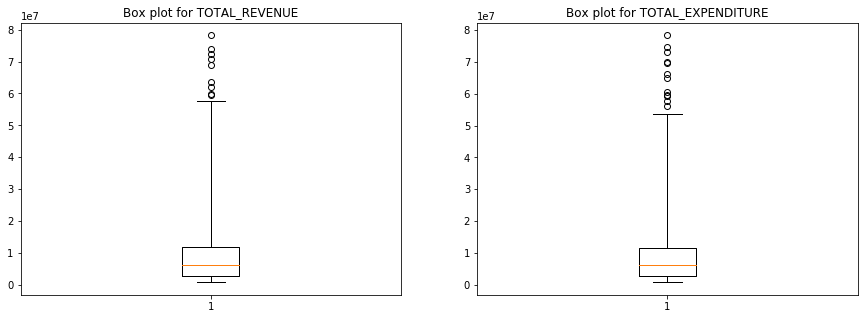

In [72]:
### lets see if they have outliers using plots. 

#box plot

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(df_education['TOTAL_REVENUE'],whis = 5)
plt.title('Box plot for TOTAL_REVENUE')
#plt.show()


#df_education[['TOTAL_REVENUE']].boxplot(whis = 5)
#plt.title('Box plot for TOTAL_REVENUE')
#plt.show()

plt.subplot(1,2,2)
plt.boxplot(df_education['TOTAL_EXPENDITURE'],whis = 5 )
plt.title('Box plot for TOTAL_EXPENDITURE')
plt.show()

#df_education[['TOTAL_EXPENDITURE']].boxplot(whis = 5)
#plt.title('Box plot for TOTAL_EXPENDITURE')
#plt.show()




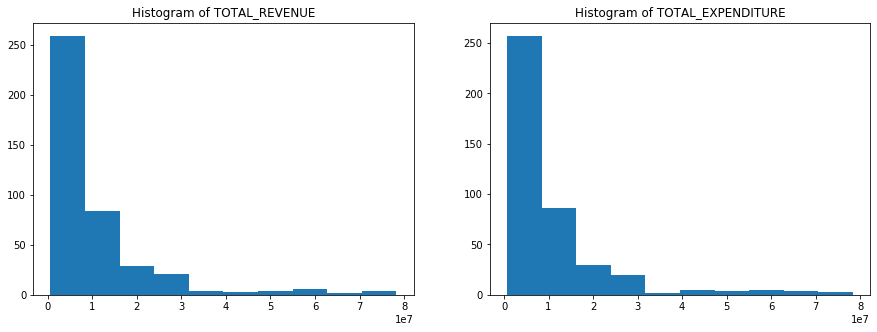

In [73]:
#histogram

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(df_education['TOTAL_REVENUE'])
plt.title("Histogram of TOTAL_REVENUE")
#plt.show()


#df_education['TOTAL_REVENUE'].hist(bins=200)
#plt.title("Histogram of TOTAL_REVENUE")
#plt.show()

plt.subplot(1,2,2)
plt.hist(df_education['TOTAL_EXPENDITURE'])
plt.title("Histogram of TOTAL_EXPENDITURE")
plt.show()

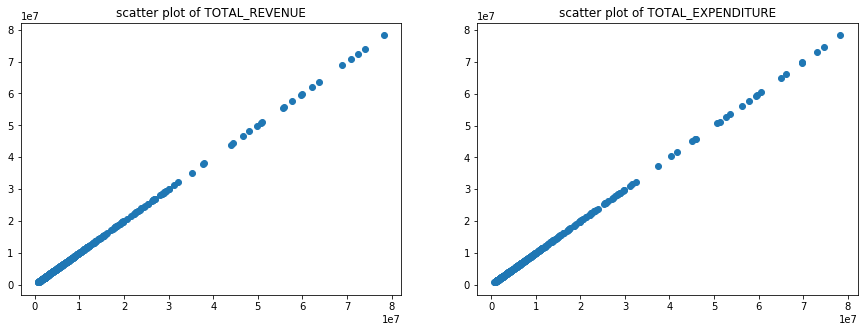

In [74]:
# scatter plot

#must have x, y so both are same cols

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.scatter(df_education['TOTAL_REVENUE'], df_education['TOTAL_REVENUE'] )
plt.title("scatter plot of TOTAL_REVENUE")
#plt.show()


plt.subplot(1,2,2)
plt.scatter(df_education['TOTAL_EXPENDITURE'], df_education['TOTAL_EXPENDITURE'] )
plt.title("scatter plot of TOTAL_EXPENDITURE")
plt.show()



In [67]:
# Detecting outlier numerically - using Zscore 
# determine outliers by setting the threshold to 1, 2, 3, and 4

z_score_total_revenue = zscore(df_education['TOTAL_REVENUE'])

for threshold in range(1,5):
    print("When using threshold: {}".format(threshold))
    print("Number of outliers is: {}".format(len((np.where(z_score_total_revenue > threshold)[0]))))
# print(z_score_total_revenue)


When using threshold: 1
Number of outliers is: 45
When using threshold: 2
Number of outliers is: 21
When using threshold: 3
Number of outliers is: 15
When using threshold: 4
Number of outliers is: 6


In [68]:
# Detecting outlier numerically - using Zscore 

z_score_total_expenditure = zscore(df_education['TOTAL_EXPENDITURE'])

for threshold in range(1,5):
    print("When using threshold: {}".format(threshold))
    print("Number of outliers is: {}".format(len((np.where(z_score_total_expenditure > threshold)[0]))))


When using threshold: 1
Number of outliers is: 43
When using threshold: 2
Number of outliers is: 22
When using threshold: 3
Number of outliers is: 16
When using threshold: 4
Number of outliers is: 7


### Applying Tukey's method to detect outliers

In [75]:
# using IQR. Lets use 25th and 75th QR for this

Q75, Q25 = np.percentile(df_education['TOTAL_REVENUE'], [75,25])
iqr = Q75-Q25

for threshold in np.arange(1,5,0.5):
    min_val = Q25 - (iqr*threshold)
    max_val = Q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((df_education["TOTAL_REVENUE"] > max_val) 
                      | (df_education["TOTAL_REVENUE"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 54
The score threshold is: 1.5
Number of outliers is: 40
The score threshold is: 2.0
Number of outliers is: 24
The score threshold is: 2.5
Number of outliers is: 22
The score threshold is: 3.0
Number of outliers is: 19
The score threshold is: 3.5
Number of outliers is: 17
The score threshold is: 4.0
Number of outliers is: 15
The score threshold is: 4.5
Number of outliers is: 12


In [76]:
# using IQR. Lets use 25th and 75th QR for this

Q75, Q25 = np.percentile(df_education['TOTAL_EXPENDITURE'], [75,25])
iqr = Q75-Q25

for threshold in np.arange(1,5,0.5):
    min_val = Q25 - (iqr*threshold)
    max_val = Q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((df_education["TOTAL_EXPENDITURE"] > max_val) 
                      | (df_education["TOTAL_EXPENDITURE"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 57
The score threshold is: 1.5
Number of outliers is: 43
The score threshold is: 2.0
Number of outliers is: 28
The score threshold is: 2.5
Number of outliers is: 22
The score threshold is: 3.0
Number of outliers is: 21
The score threshold is: 3.5
Number of outliers is: 19
The score threshold is: 4.0
Number of outliers is: 16
The score threshold is: 4.5
Number of outliers is: 14


### 3. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

In [ ]:
# Dropping them

In [96]:
# winsorizing them - setting values of extreme points - one way winsorization at 90th percentile

winsorized_TOTAL_REVENUE = winsorize(df_education["TOTAL_REVENUE"], (0, 0.10))

winsorized_TOTAL_REVENUE



masked_array(data=[ 3365113.,  4143304.,  2183384., 25293076.,  3891203.,
                    4686025.,   678874., 13684457.,  1199019.,  3258040.,
                    3622788.,  3879633.,  1485138.,  5688918.,  7129757.,
                     944623.,  1750519.,  6516400.,  4123018., 22241369.,
                    6674519.,  6354593.,  6342623.,   664057.,  4885917.,
                    5479168.,  2844855., 25293076.,  5884078.,   881423.,
                   11197766.,  1404895.,  1452222.,  8489991.,  3518271.,
                    4330089.,  4785331.,  1792390.,  7419047.,  9464271.,
                    7344747.,  6675260.,  1104935.,  2263952.,  2252416.,
                    2191695.,  9064700.,   812982., 15327834.,  3906833.,
                    4369400.,  4690418.,  5338531., 25293076.,  2546642.,
                    1211370.,  8911426.,  2243151.,  5196054.,  1425948.,
                    6529894.,  3241275., 25293076.,  6297242.,  6959891.,
                    1242436.,  1114061

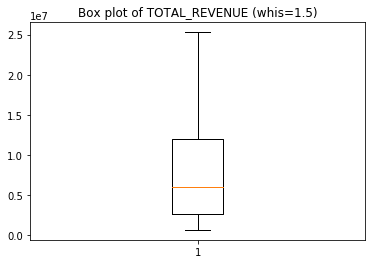

In [97]:
plt.boxplot(winsorized_views_TOTAL_REVENUE)
plt.title("Box plot of TOTAL_REVENUE (whis=1.5)")
plt.show()

In [98]:
# winsorizing them - setting values of extreme points - one way winsorization at 90th percentile

winsorized_TOTAL_EXPENDITURE = winsorize(df_education["TOTAL_EXPENDITURE"], (0, 0.10))

winsorized_TOTAL_EXPENDITURE

masked_array(data=[ 3572283.,  4391555.,  2297381., 25572112.,  4075165.,
                    4538234.,   703245., 13936240.,  1231550.,  3284185.,
                    3826435.,  3815375.,  1465093.,  5825606.,  7479576.,
                     924259.,  1642517.,  6517111.,  4284181., 22401797.,
                    6903384.,  6578388.,  6521058.,   676305.,  5003267.,
                    5397194.,  2683400., 25572112.,  5605280.,   858807.,
                   10884510.,  1363511.,  1467977.,  8518477.,  3327090.,
                    4510972.,  4807097.,  1842276.,  7355698.,  9466363.,
                    7736391.,  6708608.,  1051768.,  2165529.,  2437438.,
                    2165031.,  9275837.,   802768., 14909952.,  3876871.,
                    4398318.,  4961392.,  5805181., 25572112.,  2478420.,
                    1193813.,  9154676.,  2243563.,  5298932.,  1610289.,
                    6210287.,  3242799., 25572112.,  6685029.,  6751815.,
                    1317447.,  1105963

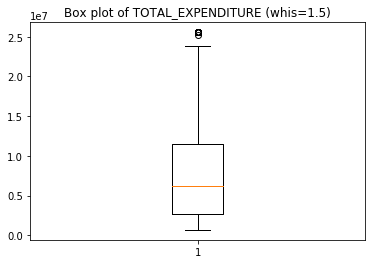

In [99]:
# this looks like it may still have outliers - should we go to 90th percentile
plt.boxplot(winsorized_views_TOTAL_EXPENDITURE)
plt.title("Box plot of TOTAL_EXPENDITURE (whis=1.5)")
plt.show()

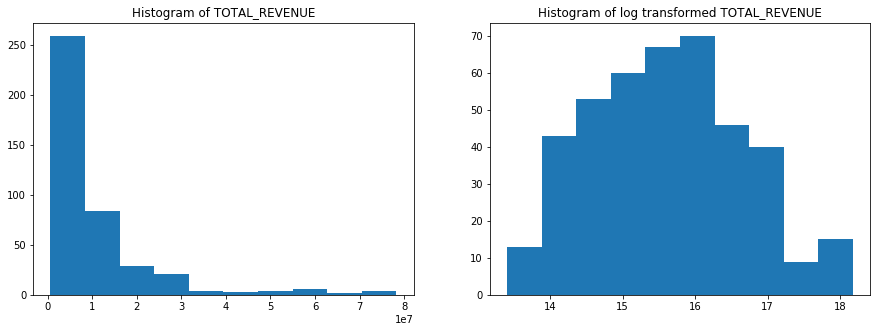

In [100]:
# Transforming them - use log to transform
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(df_education["TOTAL_REVENUE"])
plt.title("Histogram of TOTAL_REVENUE")

plt.subplot(1,2,2)
plt.hist(np.log(df_education["TOTAL_REVENUE"]))
plt.title("Histogram of log transformed TOTAL_REVENUE")
plt.show()

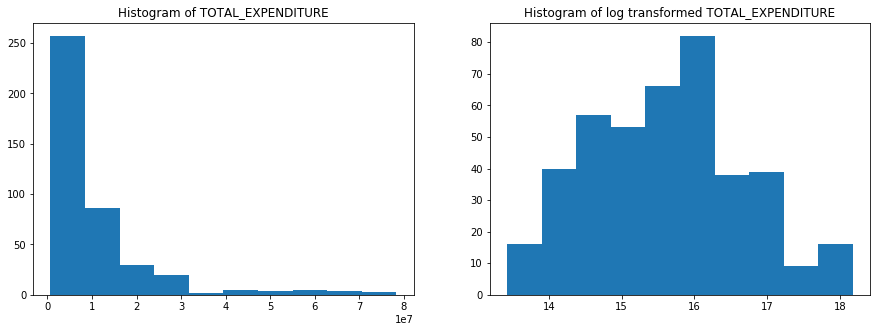

In [101]:
# Transforming them - use log to transform
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(df_education["TOTAL_EXPENDITURE"])
plt.title("Histogram of TOTAL_EXPENDITURE")

plt.subplot(1,2,2)
plt.hist(np.log(df_education["TOTAL_EXPENDITURE"]))
plt.title("Histogram of log transformed TOTAL_EXPENDITURE")
plt.show()

### Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. 

### Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.


In [102]:
df_education['budget_deficit'] = df_education['TOTAL_REVENUE'] - df_education['TOTAL_EXPENDITURE']

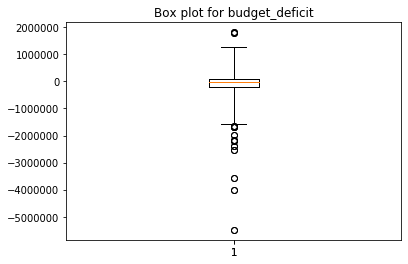

In [95]:
# detecting outliers in df['budget_deficit']

plt.boxplot(df_education['budget_deficit'],whis = 5)
plt.title('Box plot for budget_deficit')
plt.show()

In [107]:
# eliminating them using winsorization

winsorized_budget_deficit = winsorize(df_education['budget_deficit'], (.05, 0.05))
winsorized_budget_deficit

masked_array(data=[-2.07170e+05, -2.48251e+05, -1.13997e+05, -2.78711e+05,
                   -1.83962e+05,  1.47791e+05, -2.43710e+04, -2.51783e+05,
                   -3.25310e+04, -2.61450e+04, -2.03647e+05,  6.42580e+04,
                    2.00450e+04, -1.36688e+05, -3.49819e+05,  2.03640e+04,
                    1.08002e+05, -7.11000e+02, -1.61163e+05, -1.60428e+05,
                   -2.28865e+05, -2.23795e+05, -1.78435e+05, -1.22480e+04,
                   -1.17350e+05,  8.19740e+04,  1.61455e+05,  5.57170e+05,
                    2.78798e+05,  2.26160e+04,  3.13256e+05,  4.13840e+04,
                   -1.57550e+04, -2.84860e+04,  1.91181e+05, -1.80883e+05,
                   -2.17660e+04, -4.98860e+04,  6.33490e+04, -2.09200e+03,
                   -3.91644e+05, -3.33480e+04,  5.31670e+04,  9.84230e+04,
                   -1.85022e+05,  2.66640e+04, -2.11137e+05,  1.02140e+04,
                    4.17882e+05,  2.99620e+04, -2.89180e+04, -2.70974e+05,
                   -4.666

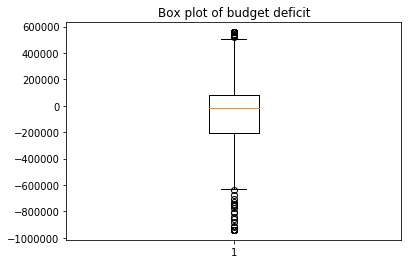

In [108]:
plt.boxplot(winsorized_budget_deficit)
plt.title("Box plot of budget deficit")
plt.show()

### 4.  Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

In [109]:
budget_deficit2 = winsorized_TOTAL_REVENUE - winsorized_TOTAL_EXPENDITURE
budget_deficit2

masked_array(data=[-2.071700e+05, -2.482510e+05, -1.139970e+05,
                   -2.790360e+05, -1.839620e+05,  1.477910e+05,
                   -2.437100e+04, -2.517830e+05, -3.253100e+04,
                   -2.614500e+04, -2.036470e+05,  6.425800e+04,
                    2.004500e+04, -1.366880e+05, -3.498190e+05,
                    2.036400e+04,  1.080020e+05, -7.110000e+02,
                   -1.611630e+05, -1.604280e+05, -2.288650e+05,
                   -2.237950e+05, -1.784350e+05, -1.224800e+04,
                   -1.173500e+05,  8.197400e+04,  1.614550e+05,
                   -2.790360e+05,  2.787980e+05,  2.261600e+04,
                    3.132560e+05,  4.138400e+04, -1.575500e+04,
                   -2.848600e+04,  1.911810e+05, -1.808830e+05,
                   -2.176600e+04, -4.988600e+04,  6.334900e+04,
                   -2.092000e+03, -3.916440e+05, -3.334800e+04,
                    5.316700e+04,  9.842300e+04, -1.850220e+05,
                    2.666400e+04, -2.111

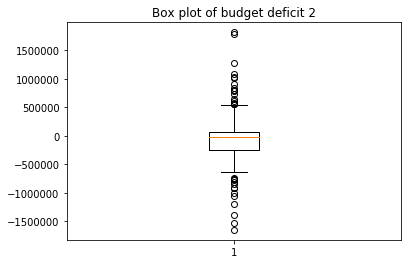

In [110]:
plt.boxplot(budget_deficit2)
plt.title("Box plot of budget deficit 2")
plt.show()

In [112]:
winsorized_budget2 = winsorize(budget_deficit2, (0.05, 0.05))
winsorized_budget2

masked_array(data=[-2.07170e+05, -2.48251e+05, -1.13997e+05, -2.79036e+05,
                   -1.83962e+05,  1.47791e+05, -2.43710e+04, -2.51783e+05,
                   -3.25310e+04, -2.61450e+04, -2.03647e+05,  6.42580e+04,
                    2.00450e+04, -1.36688e+05, -3.49819e+05,  2.03640e+04,
                    1.08002e+05, -7.11000e+02, -1.61163e+05, -1.60428e+05,
                   -2.28865e+05, -2.23795e+05, -1.78435e+05, -1.22480e+04,
                   -1.17350e+05,  8.19740e+04,  1.61455e+05, -2.79036e+05,
                    2.78798e+05,  2.26160e+04,  3.13256e+05,  4.13840e+04,
                   -1.57550e+04, -2.84860e+04,  1.91181e+05, -1.80883e+05,
                   -2.17660e+04, -4.98860e+04,  6.33490e+04, -2.09200e+03,
                   -3.91644e+05, -3.33480e+04,  5.31670e+04,  9.84230e+04,
                   -1.85022e+05,  2.66640e+04, -2.11137e+05,  1.02140e+04,
                    4.17882e+05,  2.99620e+04, -2.89180e+04, -2.70974e+05,
                   -4.666

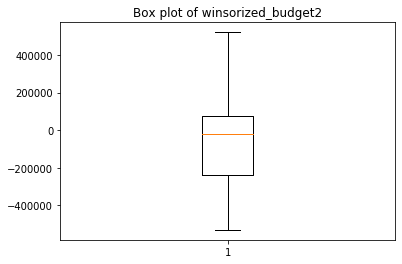

In [113]:
plt.boxplot(winsorized_budget2)
plt.title("Box plot of winsorized_budget2")
plt.show()

* Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

In [115]:
pd.DataFrame({"original_budget": df_education['budget_deficit'], "winsorized_budget1": winsorized_budget_deficit,
              "winsorized_budget2": winsorized_budget2}).describe()

,original_budget,winsorized_budget1,winsorized_budget2
count,4.160000e+02,416.000000,416.000000
mean,-1.066341e+05,-72673.185096,-45855.629808
std,6.006208e+05,344115.738058,247825.646391
min,-5.487742e+06,-940187.000000,-530721.000000
25%,-2.040230e+05,-204023.000000,-240661.750000
50%,-1.434850e+04,-14348.500000,-22116.500000
75%,8.359700e+04,83597.000000,73141.750000
max,1.816932e+06,557170.000000,520719.000000



* If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

* Submit your work below, and plan on discussing with your mentor. You can also take a look at this example solution.